<a href="https://colab.research.google.com/github/shreyareddy423/MINI-PROJECT/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader

In [ ]:
!mkdir images

In [ ]:
from bing_image_downloader import downloader
downloader.download("eiffel tower",limit=30,output_dir='images',
                    adult_filter_off=True)

In [ ]:
downloader.download("charminar",limit=30,output_dir='images',
                    adult_filter_off=True)

In [ ]:
downloader.download("Kanyakumari Sunrise",limit=30,output_dir='images',
                    adult_filter_off=True)

In [ ]:
import numpy as np

a = np.array([[1,2,3,4,5],
              [4,5,6,7,8]])
a.ndim
a.flatten()

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []
DATADIR = '/content/images'
CATEGORIES = ['eiffel tower','charminar','Kanyakumari Sunrise']
for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)
   

In [ ]:
len(flat_data[0])

In [ ]:
target

In [ ]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                                 test_size=0.3,random_state=109)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train) 

In [ ]:
y_pred = clf.predict(x_test)
y_pred

In [ ]:
y_test

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy_score(y_pred,y_test)

In [ ]:
confusion_matrix(y_pred,y_test)

In [ ]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [ ]:
model = pickle.load(open('img_model.p','rb'))

Enter your URLhttps://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Eiffel_Tower_20051010.jpg/799px-Eiffel_Tower_20051010.jpg
(600, 799, 3)
 PREDICTED OUTPUT: eiffel tower


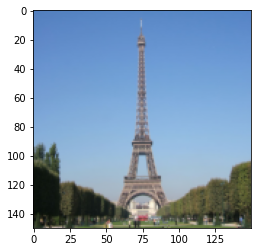

In [ ]:
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resize = resize(img,(150,150,3))
flat_data.append(img_resize.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resize)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')